In [1]:
# 02_pca_analysis.ipynb

# 1. Apply PCA to reduce feature dimensionality while maintaining variance.

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Even though X_final is scaled, PCA sometimes performs better if re-scaled or confirming consistency.
                                               # However, our X_final is already scaled.

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the preprocessed data from the previous notebook
# Adjust path if your 'data' folder is structured differently relative to this notebook
input_data_path = '../data/' # Relative path to data folder from notebooks folder
X_final = pd.read_csv(os.path.join(input_data_path, 'X_processed.csv'))
y = pd.read_csv(os.path.join(input_data_path, 'y_processed.csv'))

print("Loaded X_final shape:", X_final.shape)
print("Loaded y shape:", y.shape)

# Initialize PCA - We will start without specifying n_components to determine optimal later
# Then, we'll re-run with the optimal number.
# For now, let's use a PCA object that can capture all possible components
pca = PCA(n_components=None) # n_components=None means keep all components initially

# Fit PCA on X_final and transform the data
# X_final is already standardized from the previous step, which is good practice for PCA
pca.fit(X_final)
X_pca = pca.transform(X_final)

# Convert the PCA transformed data to a DataFrame for easier handling
# The column names will be 'PC1', 'PC2', etc.
X_pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print("\nFirst 5 rows of PCA-transformed data (X_pca_df):")
print(X_pca_df.head())
print(f"Shape of PCA-transformed data: {X_pca_df.shape}")

Loaded X_final shape: (303, 20)
Loaded y shape: (303, 1)

First 5 rows of PCA-transformed data (X_pca_df):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.072490  0.258394  1.037182 -0.119774  0.953289 -0.168047 -0.151114   
1 -2.804616  0.536802  0.003767 -0.617366 -0.979691 -0.090323 -0.259099   
2 -1.957112 -1.208116 -0.428867  0.056204  0.846473  0.874964 -0.066097   
3  1.135660 -0.251109  1.406952  2.691248  1.082938 -0.893851  0.210580   
4  1.591257 -0.273598  0.984122  0.735972  0.129932 -0.368240 -0.827301   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.520553 -1.032009 -0.042051 -0.232873  0.586556  0.101403  0.503292   
1  0.358687 -0.161476  0.112805 -0.161623  0.408115  0.413059 -0.593314   
2  0.304299  0.241857  0.124506 -0.386049  0.130411 -0.373702 -0.334304   
3 -0.248456 -0.390239 -0.400314  0.143627  0.169677  0.383118 -0.057011   
4  0.489760 -0.393350  0.433480  0.376107 -0.391069 -0.582531  0.00


Explained Variance Ratio for each Principal Component:
PC1: 0.2673
PC2: 0.1574
PC3: 0.1215
PC4: 0.1080
PC5: 0.0696
PC6: 0.0480
PC7: 0.0349
PC8: 0.0326
PC9: 0.0283
PC10: 0.0252
PC11: 0.0224
PC12: 0.0188
PC13: 0.0174
PC14: 0.0151
PC15: 0.0121
PC16: 0.0067
PC17: 0.0060
PC18: 0.0044
PC19: 0.0028
PC20: 0.0016

Cumulative Explained Variance:
Up to PC1: 0.2673
Up to PC2: 0.4247
Up to PC3: 0.5462
Up to PC4: 0.6542
Up to PC5: 0.7238
Up to PC6: 0.7718
Up to PC7: 0.8067
Up to PC8: 0.8393
Up to PC9: 0.8676
Up to PC10: 0.8928
Up to PC11: 0.9151
Up to PC12: 0.9339
Up to PC13: 0.9514
Up to PC14: 0.9665
Up to PC15: 0.9786
Up to PC16: 0.9853
Up to PC17: 0.9912
Up to PC18: 0.9956
Up to PC19: 0.9984
Up to PC20: 1.0000


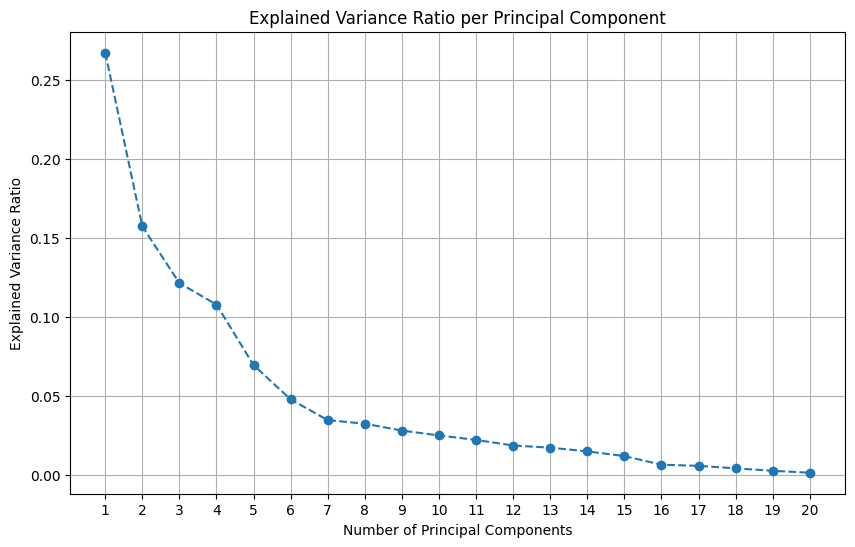

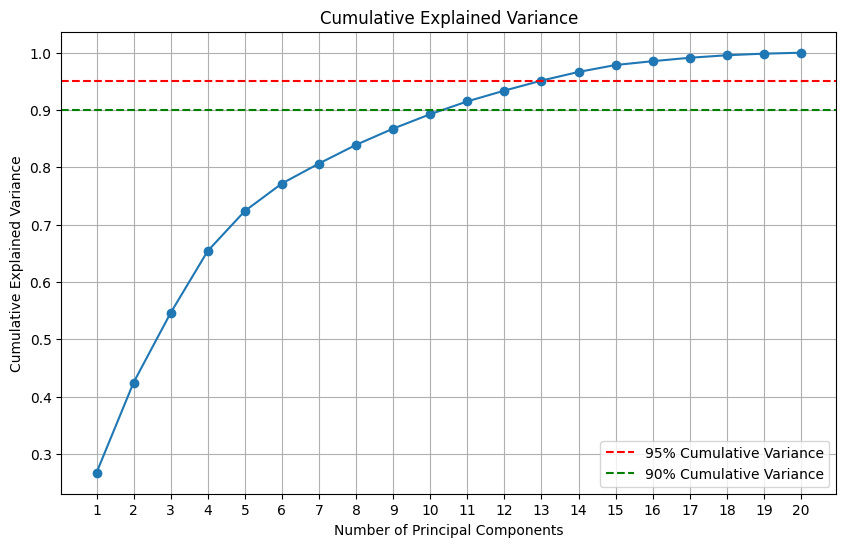


Generating Scatter Plot for first two Principal Components...


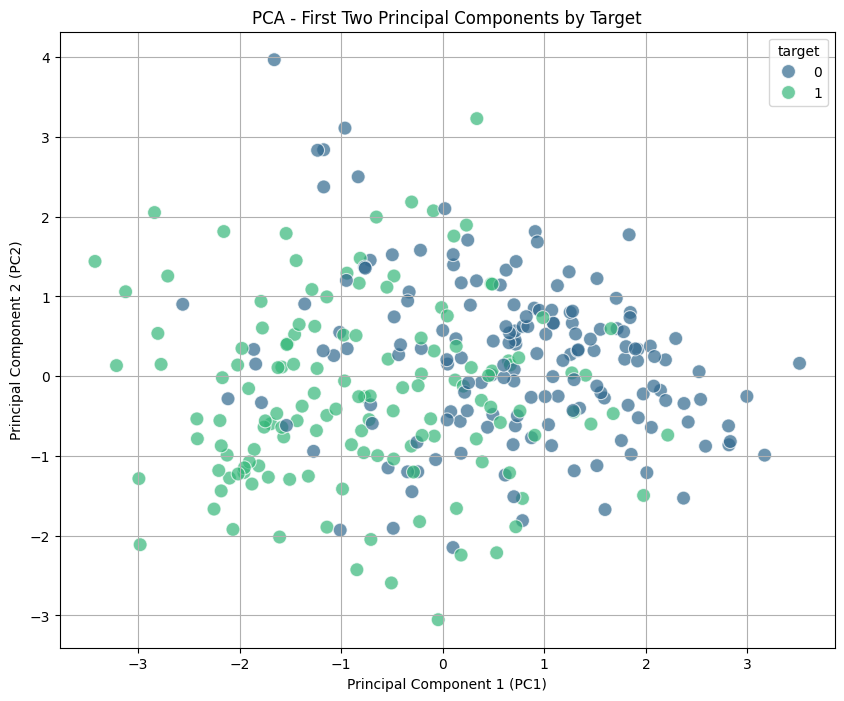


Number of components to explain 95% variance: 13

Shape of PCA-transformed data with optimal components (13): (303, 13)

First 5 rows of PCA-transformed data with optimal components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.072490  0.258394  1.037182 -0.119774  0.953289 -0.168047 -0.151114   
1 -2.804616  0.536802  0.003767 -0.617366 -0.979691 -0.090323 -0.259099   
2 -1.957112 -1.208116 -0.428867  0.056204  0.846473  0.874964 -0.066097   
3  1.135660 -0.251109  1.406952  2.691248  1.082938 -0.893851  0.210580   
4  1.591257 -0.273598  0.984122  0.735972  0.129932 -0.368240 -0.827301   

        PC8       PC9      PC10      PC11      PC12      PC13  
0  0.520553 -1.032009 -0.042051 -0.232873  0.586556  0.101403  
1  0.358687 -0.161476  0.112805 -0.161623  0.408115  0.413059  
2  0.304299  0.241857  0.124506 -0.386049  0.130411 -0.373702  
3 -0.248456 -0.390239 -0.400314  0.143627  0.169677  0.383118  
4  0.489760 -0.393350  0.433480  0.376107 -0.

In [3]:
import numpy as np

# 2. Determine the optimal number of principal components using the explained variance ratio.
# 3. Visualize PCA results using a scatter plot and cumulative variance plot.

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative Explained Variance:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"Up to PC{i+1}: {cum_ratio:.4f}")

# Plot the Explained Variance Ratio per Component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

# Plot the Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Cumulative Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Cumulative Variance') # Often target 90% or 95%
plt.grid(True)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.legend()
plt.show()


# --- Optional: Visualize PCA results using a scatter plot (for 2 components if chosen) ---
# For a general scatter plot, we often visualize the first two components
# to see if there's any separation based on the target variable.
# This part is more for visualization of the reduced space.
if X_pca_df.shape[1] >= 2:
    print("\nGenerating Scatter Plot for first two Principal Components...")
    plt.figure(figsize=(10, 8))
    # Combine PCA components with the binary target for plotting
    df_plot = pd.concat([X_pca_df[['PC1', 'PC2']], y], axis=1)
    sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_plot, palette='viridis', s=100, alpha=0.7)
    plt.title('PCA - First Two Principal Components by Target')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.grid(True)
    plt.show()

# Based on the cumulative variance plot, decide on the optimal number of components.
# A common heuristic is to pick the number of components that explain 90% or 95% of the variance.
# You will determine this number by looking at the plot.
# Let's assume for demonstration, you'd pick a certain number, e.g., components to capture 95% variance.
# For example, if 8 components capture ~95% variance, then we'd re-run PCA with n_components=8
# Find the number of components for 95% variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nNumber of components to explain 95% variance: {n_components_95}")

# Now, re-apply PCA with the optimal number of components
# (You will manually adjust n_components based on your interpretation of the plot)
# For now, let's use the 95% threshold as a guide
optimal_n_components = n_components_95 # You can change this based on your plot observation

pca_optimal = PCA(n_components=optimal_n_components)
X_pca_optimal = pca_optimal.fit_transform(X_final)

# Convert to DataFrame
X_pca_optimal_df = pd.DataFrame(data=X_pca_optimal, columns=[f'PC{i+1}' for i in range(optimal_n_components)])

print(f"\nShape of PCA-transformed data with optimal components ({optimal_n_components}): {X_pca_optimal_df.shape}")
print("\nFirst 5 rows of PCA-transformed data with optimal components:")
print(X_pca_optimal_df.head())